In [3]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

# import windIO
# import wind
# import windCAD

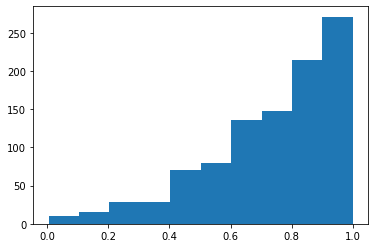

In [5]:
import scipy.stats as stats

X = np.random.uniform(low=0, high=1, size=4500)
U = np.random.uniform(low=0, high=1, size=4500)

def pi_x(x):
    new_x = (3/2)*(x**3)+(11/8)*(x**2)+(1/6)*(x)+(1/12)
    return new_x


count = 1
accept = []
updf = stats.uniform(0,1)

while (count <= 4500 and len(accept) < 1000):
    test_u = U[count]
    test_x = pi_x(X[count])/(3.125*updf.pdf(X[count]))
    if (test_u <= test_x):
        accept.append(X[count])
        count += 1
    count += 1

plt.figure()
plt.hist(accept)
plt.show()

In [ ]:
caseDir = r'D:\tempData_depot\simData_CandC\wt_tngE2/'
# velTH = r'E:\TNG\Profiles\RawData\tngE2Fr1/'
dataDirHFPI = r'E:\TNG\rawHFPI\tngE2p1/'

In [ ]:
file = r'D:\tempData_depot\simData_CandC\tngE2\tngE2Fr1_profile.csv'
temp = pd.read_csv(file)

dt = 3.7890e-04
H = 0.08

# file = r'D:\tempData_depot\simData_CandC\tngE2\tngE2Fr1_TH-UofT.csv'
# U_TH = np.transpose((pd.read_csv(file)).to_numpy())
# file = r'D:\tempData_depot\simData_CandC\tngE2\tngE2Fr1_TH-VofT.csv'
# V_TH = np.transpose((pd.read_csv(file)).to_numpy())
# file = r'D:\tempData_depot\simData_CandC\tngE2\tngE2Fr1_TH-WofT.csv'
# W_TH = np.transpose((pd.read_csv(file)).to_numpy())

file = caseDir+'tngE2Fr1_TH-UofT.npy'
U_TH = np.load(file)
file = caseDir+'tngE2Fr1_TH-VofT.npy'
V_TH = np.load(file)
file = caseDir+'tngE2Fr1_TH-WofT.npy'
W_TH = np.load(file)

vel = wind.profile(name="BLWT-E2", Z=temp.Z,UofT=U_TH,VofT=V_TH,WofT=W_TH,H=H,dt=dt,nSpectAvg=64)


In [ ]:

file_pssd = dataDirHFPI+'TNGp1E02R001P001a.pssd'
file_pssr = dataDirHFPI+'TNGp1E02R001P001a.pssr'

cp_data,analog,WTTDATALOG = wio.readPSSfile(file_pssr,file_pssd)

mainRefPitotChnlIdx = 2
fps2mps = 0.3048
UpitotOfT = 29.917 * np.sqrt(analog[:,mainRefPitotChnlIdx]) * fps2mps
Upitot = np.mean(UpitotOfT)
Zpitot = 1.48
AoA = WTTDATALOG["APPSPE"][0][0][0][0][0][0][0][16][0][0]
sampleRate = WTTDATALOG["APPSPE"][0][0][0][0][0][0][0][12][0][0]


tapFile = caseDir+'tngTapDefinition.csv'
tapGeom = pd.read_csv(tapFile)

In [ ]:

# x = UpitotOfT
# # x = WTTDATALOG["APPSPE"][0][0][0][0][0][0][0][12][0][0]
# print(np.shape(x))
# print(np.mean(x))

# print(tapGeom.to_numpy()[:,2:4])

In [ ]:
ttu = wind.building('TTU',H=0.08,B=0.2744,D=0.183,He=0.078094,
                    tapNo=tapGeom.tapNo,tapFaceID=tapGeom.faceID,
                    tapCoord2D=tapGeom.to_numpy()[:,2:4],
                    lScl=1/50)

cp = wind.Cp(name='tngE1_0000',bldg=ttu,refProfile=vel,AoA=AoA,
                samplingFreq=sampleRate,CpOfT=cp_data.transpose(),Zref_input=Zpitot,
                Uref_input=Upitot)

In [ ]:
plt.plot(cp.CpStd,'.k')
# print(cp_data.shape)

In [ ]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

import wio
import wind
import windCAD

import shapely.geometry as shp

xMin = -0.1372
xMax = 0.1372
yMin = 0
yMax = 0.091519855
bound = [(xMin, yMin), (xMin, yMax),(xMax, yMax),(xMax, yMin),(xMin, yMin),]

file = r"D:\tempData_depot\simData_CandC\tapCoords2D.csv"
data = pd.read_csv(file)
idx = data.index[data.Face_ID == 2]
taps = np.transpose(np.array([data.x[idx], data.y[idx]]))
tapNos = np.array(data.tapNo[idx],dtype=int)
idxOrig = idx


xMid = 0.1
xMid2 = 0.11
yMid = 0.02
yMid2 = 0.025
yMid3 = (yMid+yMax)*0.6

zoneDict = {
                0:['NBCC', 'Corner Zone', np.array([(xMid, yMin), (xMax, yMin), (xMax, yMid), (xMid, yMid), (xMid, yMin)])],
                1:['NBCC', 'Edge Zone',   np.array([(xMin, yMin), (xMid, yMin), (xMid, yMid), (-0.05, 0.05), (xMin, yMid), (xMin, yMin)])],
                2:['NBCC', 'Edge Zone',   np.array([(xMid, yMid3-0.01), (xMax, yMid3), (xMax, yMax), (xMid, yMax), (xMid, yMid3-0.01)])],
                3:['NBCC', 'Edge Zone',   np.array([(xMid, yMid), (xMax, yMid), (xMax, yMid3), (xMid, yMid3-0.01), (xMid, yMid)])],
                4:['NBCC', 'Field Zone',  np.array([(xMin, yMid), (-0.05, 0.05), (xMid, yMid), (xMid, yMax), (xMin, yMax), (xMin, yMid)])],
            }



# # problematic areas: 2e-4 (NBCC), 
# # edge zone doesn't divide properly: 3e-4 with ASCE  np.array([(xMid2, yMid2), (xMax, yMid2), (xMax, yMax), (xMid2, yMax), (xMid2, yMid2)]), # subzone 2  
# nominalPanelAreas = [5e-5,1e-4,1.001e-4] # 7e-5, 8e-5, 9e-5] #5e-5, 1e-4]
print(bound)

myface = windCAD.face(
                name='Roof',
                ID=0,
                origin=[-0.091,0.0,0.08],
                basisVectors=[[1,0,0],[0,1,0],[0,0,1]],
                vertices=bound,
                tapNo=tapNos,
                tapIdx=idxOrig,
                tapName=None,
                tapCoord=taps,
                zoneDict=zoneDict,
                nominalPanelAreas=[5e-5, 8e-5, 1.5e-4],
                numOfNominalPanelAreas=5,
                )
print(myface)

face2 = myface

faces = windCAD.Faces(members=[myface,face2])

In [ ]:
# print(myface.tapTribs)
print(f"Shape of 'panels': {np.shape(np.array(myface.panels,dtype=object))}")
print(f"Shape of 'pnlWeights': {np.shape(np.array(myface.tapWghtPerPanel,dtype=object))}")
print(f"Shape of 'tapIdxByPnl': {np.shape(np.array(myface.tapIdxPerPanel,dtype=object))}")

# print(myface.zoneDict[0][2][:,1])
# plot panels
for a,area in enumerate(myface.nominalPanelAreas):
    plt.figure(figsize=[20,10])
    plt.plot(taps[:,0],taps[:,1],'.k')
    for t in myface.tapTribs.geoms:
        x,y = t.exterior.xy
        plt.plot(x,y,':r',lw=0.5)
    for z,zone in enumerate(myface.zoneDict.values()):
        plt.plot(zone[2][:,0],zone[2][:,1],'--k',lw=2.0)
        print(f"Number of panels: {np.shape(myface.panels[z][a])}")
        for p in myface.panels[z][a]:
            # print(p)
            x,y = p.exterior.xy
            plt.plot(x,y,'-b',lw=0.5)
    plt.axis('equal')
    plt.show()

In [ ]:
zoneNames = {
                0:['NBCC', 'Corner Zone', [3,4,5,6,3]],
                1:['NBCC', 'Edge Zone', [3,4,5,6,3]],
                2:['NBCC', 'Edge Zone', [3,4,5,6,3]],
                3:['NBCC', 'Field Zone', [3,4,5,6,3]],
                4:['ASCE', 'Corner Zone', [3,4,5,6,3]],
                5:['ASCE', 'Edge Zone', [3,4,5,6,3]],
                6:['ASCE', 'Edge Zone', [3,4,5,6,3]],
                7:['ASCE', 'Field Zone', [3,4,5,6,3]],
            }
members = [myface.zoneDict, face2.zoneDict]

allZones = {}
i = 0
for fc in members:
    for val in fc.values():
        isNewVal = True
        for acceptedZone in allZones.values():
            if val[0] == acceptedZone[0] and val[1] == acceptedZone[1]:
                isNewVal = False
                break
        if isNewVal:
            x = list(val)[0:2]
            x.append([])
            allZones[i] = x
            i += 1
# print(allZones)

# for fc in faces:
#     print(fc.zoneDict.values())

# panelAreas, Weights, tapIdxs = faces.tapWghtAndIdxPerPanel()
# print(f"panelAreas: {np.shape(panelAreas)}")
# print(f"Weights: {np.shape(Weights)}")
# print(f"tapIdxs: {np.shape(tapIdxs)}")

# print(f"panels: {np.shape(myface.panels)}")
# print(f"panels: {np.shape(myface.tapWghtPerPanel)}")
# for z,zone in enumerate(myface.panels):
#     for a,area in enumerate(myface.panels[z]):
#         print(myface.panels[z][a])
#         for p,panel in enumerate(myface.panels[z][a]):
#             print(panel)
#             print(f"wghtsPerPanel: {np.shape(area)}")

# import shapely.geometry as shp
# pts = shp.Point(taps)
# print(pts)
# weights, tapIdxs, overlaps = windCAD.calculateTapWeightsPerPanel(myface.panels[0][0],myface.tapTribs,idxOrig)

# for i,w in enumerate(weights):
#     print(f"Panels: {myface.panels[0][0][i]}")
#     print(f"weights: {np.shape(w)}, sum: {sum(w)}")
